In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levy_stable
from scipy import stats
from collections import Counter
import math
from tqdm import tqdm



In [4]:
data = pd.read_csv('/home/chingisbadmaev/Desktop/Copula-Models-Comparison-for-Portfolio-Risk-Assessment/data/log_return_data.csv')
data


,log_return_vkco,log_return_tcs_il,log_return_poly_il,log_return_five_il
0,-0.012110,-0.004162,-0.003712,-0.013377
1,-0.035292,0.000000,-0.029352,-0.024070
2,0.011583,0.002083,-0.013279,0.007894
3,-0.006740,0.004154,0.025964,-0.002916
4,-0.009709,0.015425,-0.010984,-0.007034
...,...,...,...,...
248,-0.007648,0.018653,0.030041,0.010193
249,0.019012,0.044184,0.029452,-0.006216
250,0.018657,0.038540,0.008584,0.036732
251,0.046940,0.035287,0.042393,0.000000


### Воспользуемся встроенными функциями


In [5]:
def get_x_y_from_dataframe(dataframe, name, N):
    (y, x, _) = plt.hist(dataframe[name], bins=N)
    plt.close()
    y = y / sum(abs(y))
    return x, y

In [6]:
def get_x_y(data, N):
    (y, x, _) = plt.hist(data, bins=N)
    plt.close()
    y = y / sum(abs(y))
    return x, y

In [7]:
def det_stable_distr_params(dataframe, columns):
    alpha, beta = 1.0, 0.5
    # use scipy's quantile estimator to estimate the parameters and convert to S parameterization
    pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu, sigma)
    return pconv(*levy_stable._fitstart(dataframe[columns]))


In [10]:
# сохраняем файл с параметрами
df = pd.DataFrame(columns = ['alpha', 'beta', 'mu', 'sigma'])
for col in data.columns:
    alpha, beta, mu, sigma = det_stable_distr_params(data, col)
    dat = {'alpha':alpha, 'beta':beta, 'mu':mu, 'sigma':sigma}
    df = df.append(dat, ignore_index=True)
    
df = df.rename(mapper={0: 'vkco', 1: 'tcs_il', 2: 'poly_il', 3: 'five_il'})
df.to_csv('params_stable_distribution.csv', index=True)

In [14]:
def get_p_value(dataframe, columns):
    pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu, sigma)
    alpha, beta, _, _ = pconv(*levy_stable._fitstart(dataframe[columns]))
    r = levy_stable.rvs(alpha, beta, size=100)

    r0 = dataframe[columns]
    print(stats.ks_2samp(r, r0)[1], stats.cramervonmises_2samp(r, r0).pvalue, stats.anderson_ksamp([r, r0]).significance_level)
    return r

In [15]:
for i in tqdm(range(100)):
    gen_data = get_p_value(data, 'log_return_poly_il')
    

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_3176/147231199.py:7: UserWarning: p-value floored: true value smaller than 0.001
  print(stats.ks_2samp(r, r0)[1], stats.cramervonmises_2samp(r, r0).pvalue, stats.anderson_ksamp([r, r0]).significance_level)
 33%|███▎      | 33/100 [00:00<00:00, 162.36it/s]

1.450194097180924e-20 5.358491428353318e-12 0.001
1.8300389187602217e-18 6.818656750340324e-12 0.001
2.5492227972383644e-22 5.095579513891835e-11 0.001
6.731733238394106e-17 7.148962533065628e-10 0.001
3.3600297010559235e-19 7.327572992821274e-10 0.001
4.828270302225329e-17 6.510880723453738e-10 0.001
1.5017573760200976e-15 4.1932490812968126e-10 0.001
4.828270302225329e-17 6.7946759330084205e-12 0.001
2.5870196807768313e-18 4.251821117406962e-12 0.001
3.240727052680825e-16 3.740119325357227e-12 0.001
3.240727052680825e-16 4.4433345891548015e-12 0.001
1.450194097180924e-20 9.337752793214804e-12 0.001
3.240727052680825e-16 3.895900269057506e-10 0.001
6.731733238394106e-17 7.872115181939421e-10 0.001
1.8300389187602217e-18 4.2555958756906875e-12 0.001
4.6955294236021406e-17 7.346555586096315e-10 0.001
1.8300389187602217e-18 5.697442517771378e-12 0.001
3.4636902991101175e-17 6.671441177275028e-12 0.001
4.864120455457044e-18 4.982791956820165e-12 0.001
3.240727052680825e-16 4.0495828912412

 78%|███████▊  | 78/100 [00:00<00:00, 197.14it/s]

4.828270302225329e-17 3.643730872582296e-10 0.001
1.3455485980084997e-17 6.898039917047072e-10 0.001
9.583939863591212e-18 4.330868996760273e-12 0.001
2.6352420163024534e-15 4.0408398849223204e-10 0.001
2.34087229204874e-16 3.9706027354924345e-10 0.001
3.1358997072880546e-16 3.1999902727619656e-10 0.001
1.6909485361553093e-16 3.724552888328958e-10 0.001
2.5870196807768313e-18 6.4327432269806195e-12 0.001
9.583939863591212e-18 5.1562087932666145e-12 0.001
2.5870196807768313e-18 7.883061980962225e-10 0.001
1.0926030063301462e-15 1.251971859517198e-10 0.001
2.34087229204874e-16 6.678990693842479e-12 0.001
4.994819123660584e-18 7.810752045145364e-12 0.001
4.828270302225329e-17 3.862576924973382e-12 0.001
1.8275994342495114e-17 3.970712647571872e-12 0.001
6.731733238394106e-17 5.743516773293322e-12 0.001
1.634284665030118e-21 1.1598277893654085e-11 0.001
4.782499299083759e-19 1.1056822124544397e-11 0.001
1.0047604366227962e-20 1.4003131987294637e-11 0.001
6.701172878649601e-15 2.47080356174

100%|██████████| 100/100 [00:00<00:00, 186.03it/s]

2.34087229204874e-16 2.892225348105626e-10 0.001
3.4636902991101175e-17 7.370883903234926e-10 0.001
2.34087229204874e-16 4.216516025223882e-12 0.001
2.376067644426603e-21 2.3788415681735842e-11 0.001
1.8300389187602217e-18 6.339595515214569e-12 0.001
1.0047604366227962e-20 9.849454585264539e-12 0.001
2.34087229204874e-16 4.706124379083576e-12 0.001
1.0926030063301462e-15 7.59681539896917e-10 0.001
3.3600297010559235e-19 6.047469192083099e-10 0.001
1.3455485980084997e-17 6.295630683439413e-12 0.001
9.583939863591212e-18 6.574296662620327e-12 0.001
7.453120991004627e-25 1.1694045731758251e-10 0.001
6.524194295452586e-17 7.244760347191459e-12 0.001
1.0926030063301462e-15 3.922823177404666e-10 0.001
6.731733238394106e-17 4.667821684734008e-12 0.001
9.583939863591212e-18 7.591371975479433e-12 0.001
4.828270302225329e-17 3.628319866777474e-12 0.001
3.3600297010559235e-19 5.4927173920304995e-12 0.001
7.839661943942776e-22 1.723554632349078e-11 0.001
2.9419159922115997e-20 2.4434565482067683e-

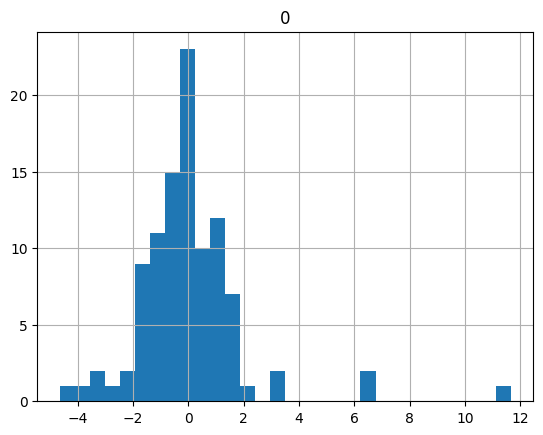

<AxesSubplot: >

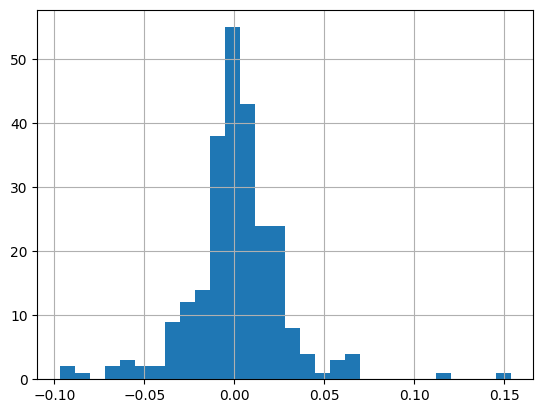

In [17]:
pd.DataFrame(gen_data).hist(bins=30)
plt.show()
data['log_return_poly_il'].hist(bins=30)